<style>
#title {
    text-align: center;
    font-family: Helvetica, Sans-serif;
    font-size: 48px
}
#assign_name {
    text-align: center;
    font-size: 24px;
    font-weight: 200
}
#info {
    text-aling: left;
    font-size: 20px;
    font-weight: 200
}
#sub1 {
    text-align: center;
    font-size: 25px;
    font-weight: 200
}
#sub2 {
    text-align: left;
    font-size: 20px;
    font-weight: 200
}
#centered {
    text-align: center;
    font-weight: 500
}
</style>

<h1 id='title'>Lab 1</h1> 
<p id='assign_name'>Optical Recognition of Hadnwritten Digits</p>
<p id='info'>By Sofía Maldonado García</p>
<p id='info'>Course: Machine Learning</p>
<p id='info'>Professor: Juan Antonio Vega Fernandez</p>

In [111]:
# Imports Generales

from sklearn.datasets import load_digits #Dataset
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, LearningCurveDisplay, ShuffleSplit, learning_curve
from sklearn.metrics import classification_report

In [46]:
# Data
digits = load_digits(as_frame=True)
X = digits.data.values
Y = digits.target.values
X.shape

(1797, 64)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #Mismos splits de datos para todos los modelos

# 1 - Perceptron From Scratch

In [52]:
# Hyperparameters

lr = 0.1
max_epochs = 100

# Initialization
rng = np.random.default_rng(42)
w = rng.normal(0, 0.01, size=X.shape[1])
b = 0.0 # Bias

def step(z: float) -> float:
    return 1.0 if z >= 0 else 0.0

error_history = []

In [53]:
# Training Rule

for e in range(max_epochs):
    errors = 0
    for xi, target in zip(X, Y):
        z = np.dot(xi, w) + b
        y_hat = step(z)
        update = lr * (target- y_hat)
        w += update * xi
        b += update
        errors += int(update != 0.0)
    error_history.append(errors)
    if errors == 0:
        break

In [54]:
# Evaluate

preds = np.array([step(np.dot(xi, w) + b) for xi in X])

print(f"Learned weights: {w}")
print(f"Learned bias: {b}")
print(f"Predictions on AND inputs: {preds.astype(int)}")
print(f"Errors per epoch: {error_history}")

Learned weights: [ 3.04717080e-03  1.66399896e+04  3.23600008e+05  7.39951209e+05
  7.65471280e+05  4.19080487e+05  1.19230001e+05  1.35299968e+04
  4.49999832e+02  1.23029991e+05  6.84790009e+05  7.25051108e+05
  5.84651601e+05  5.36800911e+05  1.54520005e+05  1.02199914e+04
  1.00003688e+02  1.58229990e+05  6.49660309e+05  3.96561500e+05
  4.02251598e+05  5.25990593e+05  1.25430012e+05  3.72999845e+03
  2.99957167e+01  1.27520696e+05  5.93471505e+05  6.36761604e+05
  6.96861604e+05  5.39020204e+05  1.42480021e+05  1.19995936e+02
 -5.12242729e-03  1.06739992e+05  4.78580106e+05  6.54841611e+05
  6.95791599e+05  5.97410292e+05  1.81379992e+05  6.50592788e-03
  4.80007433e+02  7.82200054e+04  3.90370093e+05  4.51321602e+05
  4.73441601e+05  5.21000602e+05  2.30370009e+05  2.45000224e+03
  3.30006789e+02  4.06800007e+04  4.29380103e+05  5.49701606e+05
  4.84101585e+05  4.90620597e+05  2.40429995e+05  7.91999361e+03
  9.99724858e+00  1.49300149e+04  3.50299991e+05  7.53891110e+05
  6.9100

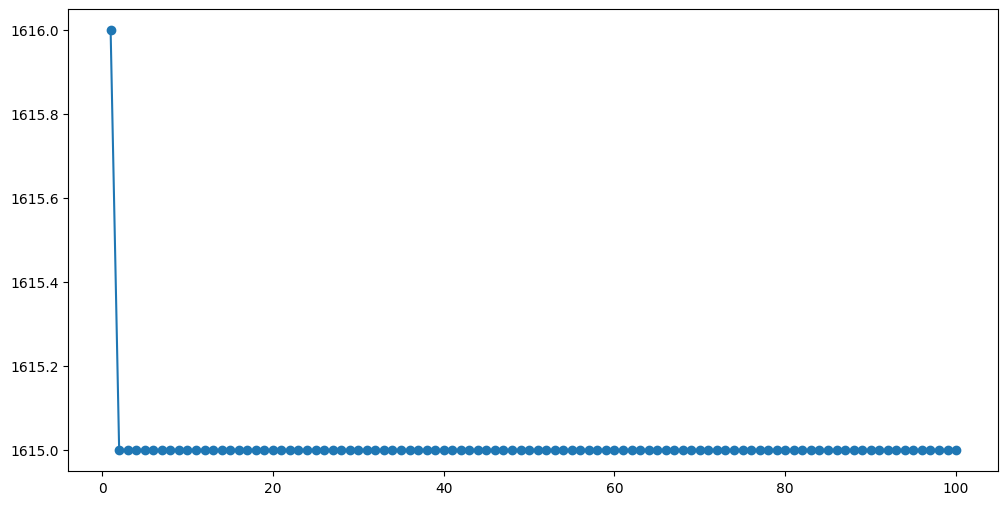

In [57]:
# Plot learning curve

plt.figure(figsize=(12,6))
plt.plot(range(1, len(error_history) + 1), error_history, marker="o")
plt.show()

# 2 - Perceptron, sklearn

In [85]:
# Creación de Modelo
model2 = Perceptron(tol=1e-3, random_state=42, max_iter=1000, verbose=1)

# Fitting a la data de prueba
model2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_test)

-- Epoch 1
Norm: 281.56, NNZs: 51, Bias: -3.000000, T: 1437, Avg. loss: 21.011830
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 295.50, NNZs: 52, Bias: -3.000000, T: 2874, Avg. loss: 2.195546
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 333.22, NNZs: 53, Bias: -2.000000, T: 4311, Avg. loss: 1.203201
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 369.72, NNZs: 53, Bias: -3.000000, T: 5748, Avg. loss: 3.130132
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 395.28, NNZs: 53, Bias: -3.000000, T: 7185, Avg. loss: 2.699374
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 407.55, NNZs: 53, Bias: -4.000000, T: 8622, Avg. loss: 3.544189
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 407.55, NNZs: 53, Bias: -4.000000, T: 10059, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 407.55, NNZs: 53, Bias: -4.000000, T: 11496, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 407.55, NNZs: 53, Bias: -4.000000, T: 12933, Avg. lo

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [107]:
# Testing

print(classification_report(y_test, y_pred_2, digits=5))  

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    1.00000   1.00000   1.00000        28
           2    0.97059   1.00000   0.98507        33
           3    0.94286   0.97059   0.95652        34
           4    1.00000   1.00000   1.00000        46
           5    0.93750   0.95745   0.94737        47
           6    0.97143   0.97143   0.97143        35
           7    1.00000   0.97059   0.98507        34
           8    0.96667   0.96667   0.96667        30
           9    0.97368   0.92500   0.94872        40

    accuracy                        0.97500       360
   macro avg    0.97627   0.97617   0.97609       360
weighted avg    0.97527   0.97500   0.97499       360



# 3 - Multi-layer Perceptron

In [95]:
# Creación de modelo
model3 = MLPClassifier(max_iter=50, verbose=1) # 50 porque el anterior solo necesitó 23, supondré que este necesita incluso menos
model3.fit(X_train, y_train)
y_pred_3 = model3.predict(X_test)

Iteration 1, loss = 6.98585290
Iteration 2, loss = 3.31232570
Iteration 3, loss = 1.86138026
Iteration 4, loss = 1.15673232
Iteration 5, loss = 0.77053325
Iteration 6, loss = 0.55875278
Iteration 7, loss = 0.42867346
Iteration 8, loss = 0.34917498
Iteration 9, loss = 0.28800036
Iteration 10, loss = 0.24936847
Iteration 11, loss = 0.21730918
Iteration 12, loss = 0.19295019
Iteration 13, loss = 0.17362501
Iteration 14, loss = 0.15575332
Iteration 15, loss = 0.14434809
Iteration 16, loss = 0.12902664
Iteration 17, loss = 0.12184226
Iteration 18, loss = 0.10857758
Iteration 19, loss = 0.10173156
Iteration 20, loss = 0.09419786
Iteration 21, loss = 0.08688775
Iteration 22, loss = 0.08077748
Iteration 23, loss = 0.07689945
Iteration 24, loss = 0.07032902
Iteration 25, loss = 0.06602609
Iteration 26, loss = 0.06081968
Iteration 27, loss = 0.05587226
Iteration 28, loss = 0.05327337
Iteration 29, loss = 0.04954378
Iteration 30, loss = 0.04827973
Iteration 31, loss = 0.04688400
Iteration 32, los

c:\Users\pixta\miniconda3\envs\mtml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
# Testing

print(classification_report(y_test, y_pred_3, digits=5))

              precision    recall  f1-score   support

           0    0.97059   1.00000   0.98507        33
           1    1.00000   1.00000   1.00000        28
           2    1.00000   1.00000   1.00000        33
           3    0.94286   0.97059   0.95652        34
           4    1.00000   1.00000   1.00000        46
           5    0.93878   0.97872   0.95833        47
           6    0.97143   0.97143   0.97143        35
           7    1.00000   0.97059   0.98507        34
           8    0.96552   0.93333   0.94915        30
           9    0.97368   0.92500   0.94872        40

    accuracy                        0.97500       360
   macro avg    0.97629   0.97497   0.97543       360
weighted avg    0.97534   0.97500   0.97496       360



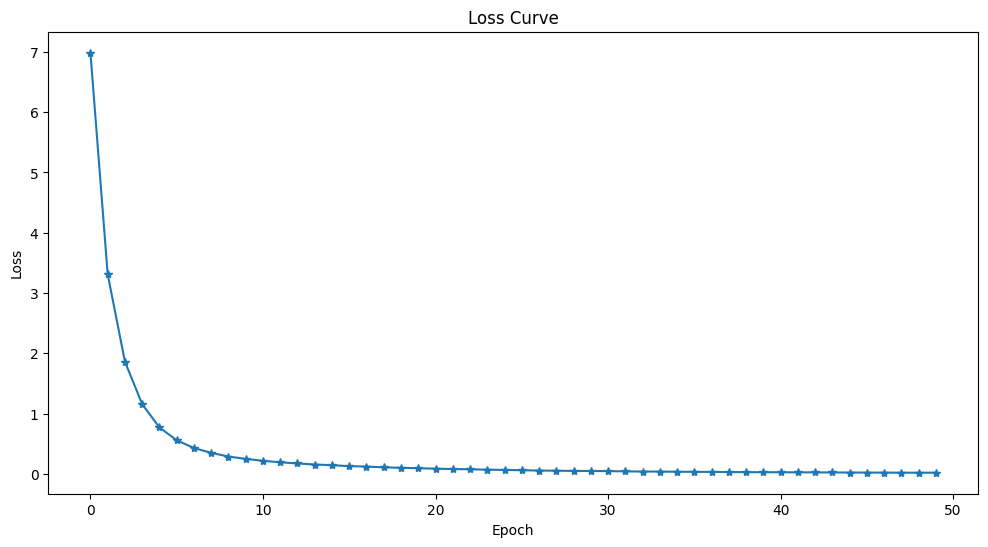

In [98]:
# Curva de aprendizaje

plt.figure(figsize=(12,6))
plt.plot(model3.loss_curve_, marker="*")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

# 4 - SVC

In [108]:
# Creación de modelo
model4 = SVC(max_iter=-1)
model4.fit(X_train, y_train)
y_pred_4 = model4.predict(X_test)

In [110]:
# Testing

print(classification_report(y_test, y_pred_4, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    1.00000   1.00000   1.00000        28
           2    1.00000   1.00000   1.00000        33
           3    1.00000   1.00000   1.00000        34
           4    1.00000   1.00000   1.00000        46
           5    0.97872   0.97872   0.97872        47
           6    0.97222   1.00000   0.98592        35
           7    0.97059   0.97059   0.97059        34
           8    1.00000   0.96667   0.98305        30
           9    0.95000   0.95000   0.95000        40

    accuracy                        0.98611       360
   macro avg    0.98715   0.98660   0.98683       360
weighted avg    0.98619   0.98611   0.98611       360



# 5 - XGBoost Classifier

In [117]:
# Creación de Modelo
model5 = GradientBoostingClassifier(max_depth=3)
model5.fit(X_train, y_train)
y_pred_5 = model5.predict(X_test)

In [118]:
# Testing

print(classification_report(y_test, y_pred_5, digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        33
           1    0.93333   1.00000   0.96552        28
           2    1.00000   0.96970   0.98462        33
           3    1.00000   0.94118   0.96970        34
           4    1.00000   0.95652   0.97778        46
           5    0.97872   0.97872   0.97872        47
           6    0.97059   0.94286   0.95652        35
           7    0.91667   0.97059   0.94286        34
           8    0.90909   1.00000   0.95238        30
           9    0.97436   0.95000   0.96203        40

    accuracy                        0.96944       360
   macro avg    0.96828   0.97096   0.96901       360
weighted avg    0.97088   0.96944   0.96962       360



### Notas y Referencias 

[1] https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html <br>
[2] https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html <br>
[3] https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html <br>

# Preguntas
1 - En el Perceptron original, como podría graficar la learning curve?